# Indian state data anaylsis



## intro
##### Collecting raw data on GDSP, literacy growth, and population from official websites and Kaggle datasets, then cleaning and merging them to create an Excel report with visual insights.

### importing libraries

In [50]:
import pandas as pd
import openpyxl
from matplotlib import pyplot as plt

### loading data

In [51]:
GSDP_state=pd.read_csv(r"D:\Data-Science-Projects\statewise-pandas\data\1-indicator_nad_1a.csv")
population_df=pd.read_excel(r"D:\Data-Science-Projects\statewise-pandas\data\A-1_NO_OF_VILLAGES_TOWNS_HOUSEHOLDS_POPULATION_AND_AREA.xlsx",header=1)
literacy_rate_df=pd.read_csv(r"D:\Data-Science-Projects/statewise-pandas/data/literacy_rate/GOI.csv")


## cleaning data

### filtering population messy data

In [52]:
 population_df.head(4) # checking data


,State Code,District Code,Sub District Code,India/ State/ Union Territory/ District/ Sub-district,Name,Total/\nRural/\nUrban,Number of villages,Unnamed: 7,Number of towns,Number of households,Population,Unnamed: 11,Unnamed: 12,Area\n (In sq. km),Population per sq. km.
0,NaN,NaN,NaN,NaN,NaN,NaN,Inhabited,Uninhabited,NaN,NaN,Persons,Males,Females,NaN,NaN
1,1.0,2,3,4,5,6,7,8,9.0,10.0,11,12,13,13.00,14.0
2,0.0,000,00000,INDIA,INDIA @&,Total,597608,43324,7933.0,249501663.0,1210854977,623270258,587584719,3287469.00,382.0
3,0.0,000,00000,INDIA,INDIA $,Rural,597608,43324,0.0,168612897.0,833748852,427781058,405967794,3101473.97,279.0


In [53]:
 population_df.sample(4) # checking random data


,State Code,District Code,Sub District Code,India/ State/ Union Territory/ District/ Sub-district,Name,Total/\nRural/\nUrban,Number of villages,Unnamed: 7,Number of towns,Number of households,Population,Unnamed: 11,Unnamed: 12,Area\n (In sq. km),Population per sq. km.
15994,28.0,540,04703,SUB-DISTRICT,Raiparthy,Urban,0,0,0.0,0.0,0,0,0,0.00,0.000000
16497,28.0,544,04867,SUB-DISTRICT,Visakhapatnam (Urban),Rural,0,0,0.0,0.0,0,0,0,0.00,0.000000
7300,18.0,313,02085,SUB-DISTRICT,Golaghat,Urban,0,0,1.0,9646.0,41989,21513,20476,7.32,5736.202186
19001,32.0,592,05646,SUB-DISTRICT,Ponnani,Total,5,0,5.0,74660.0,379798,176887,202911,200.35,1896.000000


In [54]:
 population_df.info() # taking information about data



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20022 entries, 0 to 20021
Data columns (total 15 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   State  Code                                            19993 non-null  float64
 1   District Code                                          20011 non-null  object 
 2   Sub District Code                                      20015 non-null  object 
 3   India/ State/ Union Territory/ District/ Sub-district  19996 non-null  object 
 4   Name                                                   19996 non-null  object 
 5   Total/
Rural/
Urban                                    19996 non-null  object 
 6   Number of villages                                     19994 non-null  object 
 7   Unnamed: 7                                             19994 non-null  object 
 8   Number of towns                               

In [55]:
population_df.columns # get all column of poulation

Index(['State  Code', 'District Code', 'Sub District Code',
       'India/ State/ Union Territory/ District/ Sub-district', 'Name',
       'Total/\nRural/\nUrban', 'Number of villages', 'Unnamed: 7',
       'Number of towns', 'Number of households', 'Population', 'Unnamed: 11',
       'Unnamed: 12', 'Area\n (In sq. km)', 'Population per sq. km.'],
      dtype='object')

In [56]:
# dropping unnecessary column
population_df=population_df.drop(["District Code","Sub District Code","Total/\nRural/\nUrban",
                   "Number of villages","Unnamed: 7","Unnamed: 11","Number of towns","Unnamed: 12","Number of households"],axis=1)

In [57]:
#dropping unnecessary row 
population_df=population_df.drop(0,axis=0)


In [58]:
#filtering only state from raw data
population_df=population_df.loc[
    population_df["India/ State/ Union Territory/ District/ Sub-district"] == "STATE"
]
population_df.head()

,State Code,India/ State/ Union Territory/ District/ Sub-district,Name,Population,Area\n (In sq. km),Population per sq. km.
5,1.0,STATE,JAMMU & KASHMIR @&,12541302,222236.00,124.0
6,1.0,STATE,JAMMU & KASHMIR,9108060,220990.10,91.0
7,1.0,STATE,JAMMU & KASHMIR,3433242,1245.90,2755.0
320,2.0,STATE,HIMACHAL PRADESH,6864602,55673.00,123.0
321,2.0,STATE,HIMACHAL PRADESH,6176050,55402.18,111.0


In [59]:
# perform aggregation to get the clear data
population_df = population_df.groupby("State  Code").agg({
    "Name": "last",  
    "Population": "sum",
    "Area\n (In sq. km)": "sum"
}).reset_index()
population_df["Population per sq. km."] = population_df["Population"] / population_df["Area\n (In sq. km)"]
#rename the column for better understading 
population_df=population_df.rename(columns={"Name":"State",
                                            "Population":"Population_2011",
                                            "Area\n (In sq. km)":"Area_sq_km",
                                            "Population per sq. km.":"Population_Density"})
population_df.head()

,State Code,State,Population_2011,Area_sq_km,Population_Density
0,1.0,JAMMU & KASHMIR,25082604,444472.0,56.43236
1,2.0,HIMACHAL PRADESH,13729204,111346.0,123.302175
2,3.0,PUNJAB,55486676,100724.0,550.8784
3,4.0,CHANDIGARH,2110900,228.0,9258.333333
4,5.0,UTTARAKHAND,20172584,106966.0,188.588748


### cleaning and filtering  literacy_rate_df

In [60]:
print("literacy rate shape:",literacy_rate_df.shape)


literacy rate shape: (36, 8)


In [61]:
literacy_rate_df.head()

,Category,Country/ States/ Union Territories Name,Literacy Rate (Persons) - Total - 2001,Literacy Rate (Persons) - Total - 2011,Literacy Rate (Persons) - Rural - 2001,Literacy Rate (Persons) - Rural - 2011,Literacy Rate (Persons) - Urban - 2001,Literacy Rate (Persons) - Urban - 2011
0,Country,INDIA,64.8,73.0,58.7,67.8,79.9,84.1
1,State,Andhra Pradesh,60.5,67.0,54.5,60.4,76.1,80.1
2,State,Arunachal Pradesh,54.3,65.4,47.8,59.9,78.3,82.9
3,State,Assam,63.3,72.2,59.7,69.3,85.3,88.5
4,State,Bihar,47.0,61.8,43.9,59.8,71.9,76.9


In [62]:
# extract the country literacy rate for better anaylsis 
literacy_rate_df_country=literacy_rate_df.loc[literacy_rate_df["Category"]=="Country"]
literacy_rate_df_country

,Category,Country/ States/ Union Territories Name,Literacy Rate (Persons) - Total - 2001,Literacy Rate (Persons) - Total - 2011,Literacy Rate (Persons) - Rural - 2001,Literacy Rate (Persons) - Rural - 2011,Literacy Rate (Persons) - Urban - 2001,Literacy Rate (Persons) - Urban - 2011
0,Country,INDIA,64.8,73.0,58.7,67.8,79.9,84.1


In [63]:
# remove the country data from state data
literacy_rate_df=literacy_rate_df.loc[literacy_rate_df["Category"]!="Country"]
literacy_rate_df.head()

,Category,Country/ States/ Union Territories Name,Literacy Rate (Persons) - Total - 2001,Literacy Rate (Persons) - Total - 2011,Literacy Rate (Persons) - Rural - 2001,Literacy Rate (Persons) - Rural - 2011,Literacy Rate (Persons) - Urban - 2001,Literacy Rate (Persons) - Urban - 2011
1,State,Andhra Pradesh,60.5,67.0,54.5,60.4,76.1,80.1
2,State,Arunachal Pradesh,54.3,65.4,47.8,59.9,78.3,82.9
3,State,Assam,63.3,72.2,59.7,69.3,85.3,88.5
4,State,Bihar,47.0,61.8,43.9,59.8,71.9,76.9
5,State,Chhattisgarh,64.7,70.3,60.5,66.0,80.6,84.0


In [64]:
# remove the unnecessary column
literacy_rate_df=literacy_rate_df.drop("Category",axis=1)

In [65]:
# rename the the column
literacy_rate_df=literacy_rate_df.rename(columns={"Country/ States/ Union Territories Name":"State",
                                                  "Literacy Rate (Persons) - Total - 2001":"literacy_2001_total",
                                                  "Literacy Rate (Persons) - Total - 2011":"literacy_2011_total",
                                                  "Literacy Rate (Persons) - Rural - 2001":"literacy_2001_rural",
                                                  "Literacy Rate (Persons) - Rural - 2011":"literacy_2011_rural",
                                                  "Literacy Rate (Persons) - Urban - 2001":"literacy_2001_urban",
                                                  "Literacy Rate (Persons) - Urban - 2011":"literacy_2011_urban"})


# cleaning GSDP_state Data

In [66]:
GSDP_state.head()

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All-India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,359433.0,19208.0,724049.0,115523.0,NaN,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,401493.0,21663.0,822903.0,131835.0,NaN,4421.0,21609.0,391238.0,18875.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,...,452186.0,25593.0,944146.0,149817.0,NaN,5159.0,24787.0,443783.0,21870.0,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,...,511178.0,29667.0,1043371.0,161985.0,NaN,5721.0,27844.0,492424.0,24089.0,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,575631.0,NaN,1153795.0,184091.0,NaN,NaN,30304.0,551963.0,26533.0,13675331.0


In [67]:
print("GSDP shape",GSDP_state.shape)

GSDP shape (11, 36)


In [68]:
# checking missing value 
print("missing value:",GSDP_state.isna().sum())

missing value: Items  Description            0
Duration                      0
Andhra Pradesh                0
Arunachal Pradesh             2
Assam                         2
Bihar                         2
Chhattisgarh                  0
Goa                           2
Gujarat                       2
Haryana                       0
Himachal Pradesh              4
Jammu & Kashmir               2
Jharkhand                     2
Karnataka                     2
Kerala                        2
Madhya Pradesh                0
Maharashtra                   4
Manipur                       4
Meghalaya                     0
Mizoram                       4
Nagaland                      4
Odisha                        0
Punjab                        4
Rajasthan                     4
Sikkim                        2
Tamil Nadu                    0
Telangana                     0
Tripura                       4
Uttar Pradesh                 2
Uttarakhand                   2
West Bengal1             

In [69]:
GSDP_state=GSDP_state.drop("West Bengal1",axis=1) # dropping column with all null value

In [70]:
GSDP_state.columns

Index(['Items  Description', 'Duration', 'Andhra Pradesh ',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'Andaman & Nicobar Islands', 'Chandigarh', 'Delhi',
       'Puducherry', 'All-India GDP'],
      dtype='object')

In [71]:
# extracting country data  from state data
GSDP_country = GSDP_state[["Items  Description","Duration","All-India GDP"]]
GSDP_country.head()


,Items Description,Duration,All-India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,13675331.0


In [72]:
# filtering state data
GSDP_state=GSDP_state.loc[:,GSDP_state.columns!="All-India GDP"]


In [73]:
# fill the null value 
GSDP_state=GSDP_state.interpolate() 
GSDP_state.head()

C:\Users\devul\AppData\Local\Temp\ipykernel_15380\4259418398.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  GSDP_state=GSDP_state.interpolate()


,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,11165.0,751485.0,359433.0,19208.00,724049.0,115523.0,3979.00,18768.0,343767.0,16818.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,12338.0,855481.0,401493.0,21663.00,822903.0,131835.0,4421.00,21609.0,391238.0,18875.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,...,13862.0,971090.0,452186.0,25593.00,944146.0,149817.0,5159.00,24787.0,443783.0,21870.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,...,15209.0,1092564.0,511178.0,29667.00,1043371.0,161985.0,5721.00,27844.0,492424.0,24089.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,16637.0,1212668.0,575631.0,19782.26,1153795.0,184091.0,3817.71,30304.0,551963.0,26533.0


In [74]:
# checking again missing value 
print("missing value:",GSDP_state.isna().sum())


missing value: Items  Description           0
Duration                     0
Andhra Pradesh               0
Arunachal Pradesh            0
Assam                        0
Bihar                        0
Chhattisgarh                 0
Goa                          0
Gujarat                      0
Haryana                      0
Himachal Pradesh             0
Jammu & Kashmir              0
Jharkhand                    0
Karnataka                    0
Kerala                       0
Madhya Pradesh               0
Maharashtra                  0
Manipur                      0
Meghalaya                    0
Mizoram                      0
Nagaland                     0
Odisha                       0
Punjab                       0
Rajasthan                    0
Sikkim                       0
Tamil Nadu                   0
Telangana                    0
Tripura                      0
Uttar Pradesh                0
Uttarakhand                  0
Andaman & Nicobar Islands    0
Chandigarh              

In [75]:
# melting data to long formate for better comparison
GSDP_state=GSDP_state.melt(
    id_vars=["Items  Description","Duration"],
    var_name="State",
    value_name="GSDP_Value"
)
GSDP_state.head()


,Items Description,Duration,State,GSDP_Value
0,GSDP - CURRENT PRICES (` in Crore),2011-12,Andhra Pradesh,379402.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,Andhra Pradesh,411404.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,Andhra Pradesh,464272.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,Andhra Pradesh,526468.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,Andhra Pradesh,609934.0


## creating mapping dictionary 


In [76]:
# chcking unique value 
GSDP_state["State"].unique()

array(['Andhra Pradesh ', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'Andaman & Nicobar Islands', 'Chandigarh', 'Delhi',
       'Puducherry'], dtype=object)

In [77]:
# chcking unique value 

population_df["State"].unique()

array(['JAMMU & KASHMIR', 'HIMACHAL PRADESH', 'PUNJAB', 'CHANDIGARH',
       'UTTARAKHAND', 'HARYANA', 'NCT OF DELHI', 'RAJASTHAN',
       'UTTAR PRADESH', 'BIHAR', 'SIKKIM', 'ARUNACHAL PRADESH',
       'NAGALAND', 'MANIPUR', 'MIZORAM', 'TRIPURA', 'MEGHALAYA', 'ASSAM',
       'WEST BENGAL', 'JHARKHAND', 'ODISHA', 'CHHATTISGARH',
       'MADHYA PRADESH', 'GUJARAT', 'DAMAN & DIU', 'DADRA & NAGAR HAVELI',
       'MAHARASHTRA', 'ANDHRA PRADESH', 'KARNATAKA', 'GOA', 'LAKSHADWEEP',
       'KERALA', 'TAMIL NADU', 'PUDUCHERRY', 'ANDAMAN & NICOBAR ISLANDS'],
      dtype=object)

In [81]:
# chcking unique value 

literacy_rate_df["State"].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A & N Islands', 'Chandigarh', 'D & N Haveli',
       'Daman & Diu', 'Lakshadweep', 'NCT of Delhi', 'Puducherry'],
      dtype=object)

In [82]:
# printing if diffrante name of state present
print(set(population_df['State']) - set(literacy_rate_df['State']))
print(set(literacy_rate_df['State']) - set(GSDP_state['State']))
print(set(population_df['State']) - set(GSDP_state['State']))



{'RAJASTHAN', 'MEGHALAYA', 'LAKSHADWEEP', 'KERALA', 'PUNJAB', 'DAMAN & DIU', 'PUDUCHERRY', 'HIMACHAL PRADESH', 'NCT OF DELHI', 'ANDAMAN & NICOBAR ISLANDS', 'JHARKHAND', 'ODISHA', 'MAHARASHTRA', 'JAMMU & KASHMIR', 'TRIPURA', 'ARUNACHAL PRADESH', 'GUJARAT', 'KARNATAKA', 'CHANDIGARH', 'HARYANA', 'WEST BENGAL', 'DADRA & NAGAR HAVELI', 'TAMIL NADU', 'CHHATTISGARH', 'ASSAM', 'NAGALAND', 'ANDHRA PRADESH', 'SIKKIM', 'MANIPUR', 'BIHAR', 'MIZORAM', 'GOA', 'UTTARAKHAND', 'MADHYA PRADESH', 'UTTAR PRADESH'}
{'Daman & Diu', 'A & N Islands', 'NCT of Delhi', 'Andhra Pradesh', 'Lakshadweep', 'West Bengal', 'D & N Haveli'}
{'RAJASTHAN', 'MEGHALAYA', 'LAKSHADWEEP', 'KERALA', 'PUNJAB', 'DAMAN & DIU', 'PUDUCHERRY', 'HIMACHAL PRADESH', 'NCT OF DELHI', 'ANDAMAN & NICOBAR ISLANDS', 'JHARKHAND', 'ODISHA', 'MAHARASHTRA', 'JAMMU & KASHMIR', 'TRIPURA', 'ARUNACHAL PRADESH', 'GUJARAT', 'KARNATAKA', 'CHANDIGARH', 'HARYANA', 'WEST BENGAL', 'DADRA & NAGAR HAVELI', 'TAMIL NADU', 'CHHATTISGARH', 'ASSAM', 'NAGALAND', 'AN

In [83]:
# mapping dict for replace the state name 
mapping_dict={"D & N HAVELI":"DADRA & NAGAR HAVELI","A & N ISLANDS":"ANDAMAN & NICOBAR ISLANDS","NCT OF DELHI":"Delhi",}

In [84]:
# apllying mapping dictionary on all DF
population_df["State"]=population_df["State"].replace(mapping_dict)#.fillna(population_df["State"])
literacy_rate_df["State"]=literacy_rate_df["State"].replace(mapping_dict)#.fillna(literacy_rate_df["State"])
GSDP_state["State"]=GSDP_state["State"].replace(mapping_dict)#.fillna(GSDP_state["State"])



In [85]:
# again checking for conforming 
print(set(population_df['State']) - set(literacy_rate_df['State']))
print(set(literacy_rate_df['State']) - set(GSDP_state['State']))
print(set(population_df['State']) - set(GSDP_state['State']))



{'RAJASTHAN', 'Delhi', 'MEGHALAYA', 'LAKSHADWEEP', 'KERALA', 'PUNJAB', 'DAMAN & DIU', 'PUDUCHERRY', 'HIMACHAL PRADESH', 'ANDAMAN & NICOBAR ISLANDS', 'JHARKHAND', 'ODISHA', 'MAHARASHTRA', 'JAMMU & KASHMIR', 'TRIPURA', 'ARUNACHAL PRADESH', 'GUJARAT', 'KARNATAKA', 'CHANDIGARH', 'HARYANA', 'WEST BENGAL', 'DADRA & NAGAR HAVELI', 'TAMIL NADU', 'CHHATTISGARH', 'ASSAM', 'NAGALAND', 'ANDHRA PRADESH', 'SIKKIM', 'MANIPUR', 'BIHAR', 'MIZORAM', 'GOA', 'UTTARAKHAND', 'MADHYA PRADESH', 'UTTAR PRADESH'}
{'Daman & Diu', 'A & N Islands', 'NCT of Delhi', 'Andhra Pradesh', 'Lakshadweep', 'West Bengal', 'D & N Haveli'}
{'RAJASTHAN', 'MEGHALAYA', 'LAKSHADWEEP', 'KERALA', 'PUNJAB', 'DAMAN & DIU', 'PUDUCHERRY', 'HIMACHAL PRADESH', 'ANDAMAN & NICOBAR ISLANDS', 'JHARKHAND', 'ODISHA', 'MAHARASHTRA', 'JAMMU & KASHMIR', 'TRIPURA', 'ARUNACHAL PRADESH', 'GUJARAT', 'KARNATAKA', 'CHANDIGARH', 'HARYANA', 'WEST BENGAL', 'DADRA & NAGAR HAVELI', 'TAMIL NADU', 'CHHATTISGARH', 'ASSAM', 'NAGALAND', 'ANDHRA PRADESH', 'SIKKIM'

### making more clear of state data

In [86]:
# inhancing the state name
GSDP_state["State"]=GSDP_state["State"].str.strip().str.upper()
population_df["State"]=population_df["State"].str.strip().str.upper()
literacy_rate_df["State"]=literacy_rate_df["State"].str.strip().str.upper()



In [87]:
# arrenging the state alphabeticaly 
GSDP_state = GSDP_state.sort_values("State").reset_index(drop=True)
population_df = population_df.sort_values("State").reset_index(drop=True)
literacy_rate_df = literacy_rate_df.sort_values("State").reset_index(drop=True)

## merging Data frame and make master_DF

In [88]:
# creating a master dataframe  by merging all data
master_df=population_df.merge(literacy_rate_df,
                              how="left",
                              left_on=["State"],
                              right_on=["State"]
                             )
master_df=master_df.merge(GSDP_state,
                              how="left",
                              left_on=["State"],
                              right_on=["State"]
                             )
master_df

,State Code,State,Population_2011,Area_sq_km,Population_Density,literacy_2001_total,literacy_2011_total,literacy_2001_rural,literacy_2011_rural,literacy_2001_urban,literacy_2011_urban,Items Description,Duration,GSDP_Value
0,35.0,ANDAMAN & NICOBAR ISLANDS,761162,16498.0,46.136623,NaN,NaN,NaN,NaN,NaN,NaN,GSDP - CURRENT PRICES (` in Crore),2011-12,3979.00
1,35.0,ANDAMAN & NICOBAR ISLANDS,761162,16498.0,46.136623,NaN,NaN,NaN,NaN,NaN,NaN,GSDP - CURRENT PRICES (` in Crore),2013-14,5159.00
2,35.0,ANDAMAN & NICOBAR ISLANDS,761162,16498.0,46.136623,NaN,NaN,NaN,NaN,NaN,NaN,GSDP - CURRENT PRICES (` in Crore),2014-15,5721.00
3,35.0,ANDAMAN & NICOBAR ISLANDS,761162,16498.0,46.136623,NaN,NaN,NaN,NaN,NaN,NaN,GSDP - CURRENT PRICES (` in Crore),2015-16,3817.71
4,35.0,ANDAMAN & NICOBAR ISLANDS,761162,16498.0,46.136623,NaN,NaN,NaN,NaN,NaN,NaN,GSDP - CURRENT PRICES (` in Crore),2016-17,1914.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,5.0,UTTARAKHAND,20172584,106966.0,188.588748,71.6,78.8,68.1,76.3,81.4,84.5,(% Growth over previous year),2012-13,14.12
341,5.0,UTTARAKHAND,20172584,106966.0,188.588748,71.6,78.8,68.1,76.3,81.4,84.5,(% Growth over previous year),2013-14,13.64
342,5.0,UTTARAKHAND,20172584,106966.0,188.588748,71.6,78.8,68.1,76.3,81.4,84.5,(% Growth over previous year),2015-16,13.65
343,5.0,UTTARAKHAND,20172584,106966.0,188.588748,71.6,78.8,68.1,76.3,81.4,84.5,(% Growth over previous year),2016-17,13.65


In [89]:
#checking for null value 
master_df.isna().sum() 


State  Code             0
State                   0
Population_2011         0
Area_sq_km              0
Population_Density      0
literacy_2001_total    23
literacy_2011_total    23
literacy_2001_rural    23
literacy_2011_rural    23
literacy_2001_urban    23
literacy_2011_urban    23
Items  Description      4
Duration                4
GSDP_Value              4
dtype: int64

## exporting the data

In [90]:
# exporting the xlsx file with diffrent sheet 
with pd.ExcelWriter("all_states_data.xlsx") as writer:
    population_df.to_excel(writer, sheet_name="Population", index=False)
    literacy_rate_df.to_excel(writer, sheet_name="Literacy", index=False)
    GSDP_state.to_excel(writer, sheet_name="GSDP", index=False)
    master_df.to_excel(writer, sheet_name="Master", index=False)


# visualization

## plotting top 5 populate state

In [91]:
population_df.head()

,State Code,State,Population_2011,Area_sq_km,Population_Density
0,35.0,ANDAMAN & NICOBAR ISLANDS,761162,16498.0,46.136623
1,28.0,ANDHRA PRADESH,169161554,550090.0,307.516141
2,12.0,ARUNACHAL PRADESH,2767454,83743.0,33.046989
3,18.0,ASSAM,62411152,156876.0,397.837477
4,10.0,BIHAR,208198904,188326.0,1105.523953


In [92]:
# converting the population column in numeric to perform nlargest method
population_df['Population_2011'] = pd.to_numeric(population_df['Population_2011'], errors='coerce')


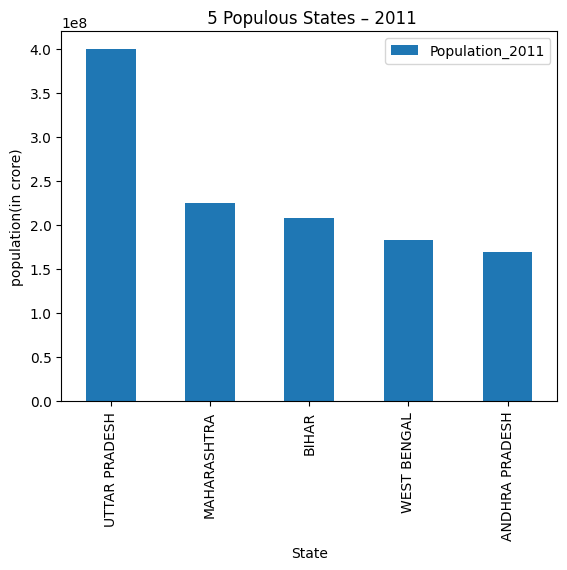

In [93]:
# plotting the top 5 populate state
top5_populasState_plot=population_df.nlargest(5, 'Population_2011',keep='first').plot.bar(x="State",
                                                     y="Population_2011",
                                                     xlabel="State",
                                                      ylabel="population(in crore)",
                                                    title=" 5 Populous States – 2011");
# saving the plot
top5_populasState_plot.figure.savefig("top5_populasState_plot.png",bbox_inches="tight")

## plotting top 7 literacy growth state

In [94]:
# calculating the litercay_growth from 2001 to 2011
literacy_rate_df["litercay_growth"]=literacy_rate_df["literacy_2011_total"]-literacy_rate_df["literacy_2001_total"]

In [95]:
# getting the top 7 state with best litercay_growth
top7=literacy_rate_df.nlargest(7,"litercay_growth",keep='first')
top7

,State,literacy_2001_total,literacy_2011_total,literacy_2001_rural,literacy_2011_rural,literacy_2001_urban,literacy_2011_urban,litercay_growth
7,D & N HAVELI,57.6,76.2,49.3,64.1,84.4,89.8,18.6
4,BIHAR,47.0,61.8,43.9,59.8,71.9,76.9,14.8
31,TRIPURA,73.2,87.2,69.7,84.9,89.2,93.5,14.0
23,NAGALAND,66.6,79.6,62.8,75.3,84.7,89.6,13.0
14,JHARKHAND,53.6,66.4,45.7,61.1,79.1,82.3,12.8
29,SIKKIM,68.8,81.4,66.8,78.9,83.9,88.7,12.6
21,MEGHALAYA,62.6,74.4,56.3,69.9,86.3,90.8,11.8


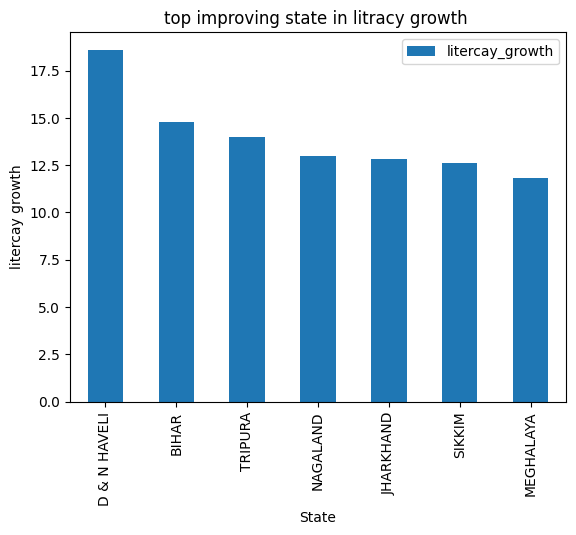

In [96]:
#plotting the bar plot of top 7  best litercay_growth state 
top7literacy_rate_plot=top7.plot.bar(x="State",
            y="litercay_growth",
             xlabel="State",
            ylabel="litercay growth",
           title="top improving state in litracy growth ",
             ) ;
top7literacy_rate_plot.figure.savefig("top7literacy_rate_plot.png",bbox_inches="tight")

## plotting gdsp over the year of among top 5 economy state

In [97]:
GSDP_state["State"].unique()

array(['ANDAMAN & NICOBAR ISLANDS', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH',
       'ASSAM', 'BIHAR', 'CHANDIGARH', 'CHHATTISGARH', 'DELHI', 'GOA',
       'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR',
       'JHARKHAND', 'KARNATAKA', 'KERALA', 'MADHYA PRADESH',
       'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND',
       'ODISHA', 'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TELANGANA', 'TRIPURA', 'UTTAR PRADESH',
       'UTTARAKHAND'], dtype=object)

In [98]:
# make the 'Duration' column index for better acessibility 

GSDP_state = GSDP_state.set_index("Duration")  


In [99]:
GSDP_state.columns

Index(['Items  Description', 'State', 'GSDP_Value'], dtype='object')

In [103]:

# # GSDP_state.loc[GSDP_state["State"]=="UTTARAKHAND"].loc["2011-12":"2016-17"]
# # GSDP_state.loc["2011-12":"2016-17"].loc[GSDP_state["State"] == "UTTARAKHAND"]


#filtering the top 5 state with  best gdp  
top5_gsdp=GSDP_state.loc[(GSDP_state["State"].isin (["UTTAR PRADESH","MAHARASHTRA","TAMIL NADU","KARNATAKA","GUJARAT"]))
                        &(GSDP_state["Items  Description"]=="GSDP - CURRENT PRICES (` in Crore)" )]
top5_gsdp

,Items Description,State,GSDP_Value
Duration,,,
2015-16,GSDP - CURRENT PRICES (` in Crore),GUJARAT,9.943160e+05
2012-13,GSDP - CURRENT PRICES (` in Crore),GUJARAT,7.244950e+05
2013-14,GSDP - CURRENT PRICES (` in Crore),GUJARAT,8.076230e+05
2014-15,GSDP - CURRENT PRICES (` in Crore),GUJARAT,8.950270e+05
2011-12,GSDP - CURRENT PRICES (` in Crore),GUJARAT,6.156060e+05
2016-17,GSDP - CURRENT PRICES (` in Crore),GUJARAT,4.971668e+05
2011-12,GSDP - CURRENT PRICES (` in Crore),KARNATAKA,6.037780e+05
2012-13,GSDP - CURRENT PRICES (` in Crore),KARNATAKA,6.917000e+05
2015-16,GSDP - CURRENT PRICES (` in Crore),KARNATAKA,1.027068e+06


In [104]:
# using pivot for change the columns
                                                
top5_gsdp=top5_gsdp.pivot(columns="State",values="GSDP_Value")
top5_gsdp



State,GUJARAT,KARNATAKA,MAHARASHTRA,TAMIL NADU,UTTAR PRADESH
Duration,,,,,
2011-12,615606.000,603778.00,1.272967e+06,751485.0,724049.000
2012-13,724495.000,691700.00,1.448466e+06,855481.0,822903.000
2013-14,807623.000,817886.00,1.647506e+06,971090.0,944146.000
2014-15,895027.000,921788.00,1.792122e+06,1092564.0,1043371.000
2015-16,994316.000,1027068.00,1.194753e+06,1212668.0,1153795.000
2016-17,497166.845,513541.28,5.973832e+05,1338766.0,576904.325


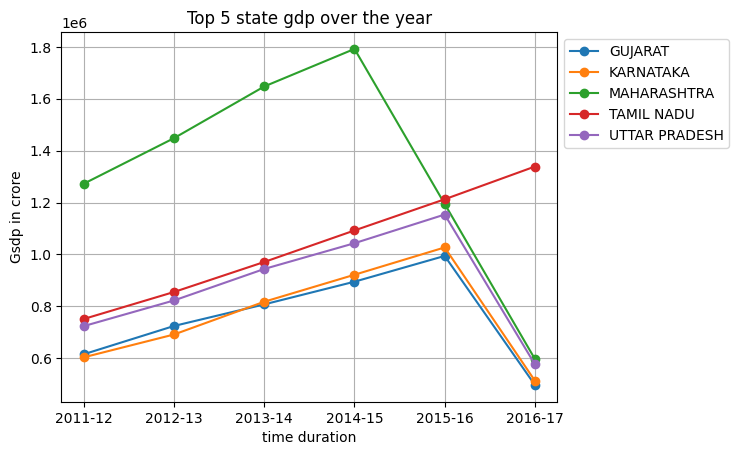

In [105]:
#plotting the top5_gsdp_plot
top5_gsdp_plot=top5_gsdp.plot(title="Top 5 state gdp over the year",
              xlabel="time duration",
              ylabel="Gsdp in crore",
              marker='o',
              grid=True).legend(bbox_to_anchor=(1,1));
#saving the plot 
top5_gsdp_plot.figure.savefig("top5_gsdp.png",bbox_inches="tight")

## conclusion and key points

#### -> handle real world data set 
#### -> clean and filter the data
#### ->merge multiple data into a master data frame 
#### ->Export data in excel format with multiple datasheet
#### ->visulize the data